# Lesson 1 Assignment - EnergyLoads
## Author - Studentname

### Instructions
In this exercise you will use visualization and summary statistical methods to explore a data set. You will be looking for interesting aspects in these data. Specifically, you will explore an energy efficiency data set.

This data set contains characteristics of over 750 buildings. The efficiency of the building is measured as either heating load or cooling load. Your goal is to find **three interesting relationships within the variables** which help you understand the energy efficiency of these buildings.

The exercise is deliberately open-ended. Whenever you approach a new data set there some open-ended exploration is required. Expect this exploration to be an iterative process. You may need to try several ideas before you find truly interesting relationships.

The key points come from examining charts and summary statistics based on distribution Heating Load and Cooling Load. 
<font color="blue">At the end of this notebook include Markdown cells outlining your 3 key points.</font>

Example description:  The heating load of buildings depends on ... Evidence for this relationship can be seen by ... in the figure and by noting .... in the table above. 


#### Tip: 
There are no categorical variables in this data set. There are two numeric variables, Orientation and Glazing Area Distribution with only 4 and 2 discrete values. You can convert these integer values to factors and examine the effect on the distribution of Heating Load and Cooling Load.

In [21]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Cleaned up Dataset location
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/EnergyEfficiencyData.csv"

In [3]:
# Read in the data
data = pd.read_csv(fileName)

In [5]:
# Verify that all the data is clean
data = data.replace(to_replace="?", value=np.nan)
data.apply(lambda x: x.isnull().sum(), axis=0)

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

In [9]:
#  Lets mame a counts column first, this will make further analysis easier
data['counts'] = 1

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2961: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3285: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a26268588>,
      dtype=object)

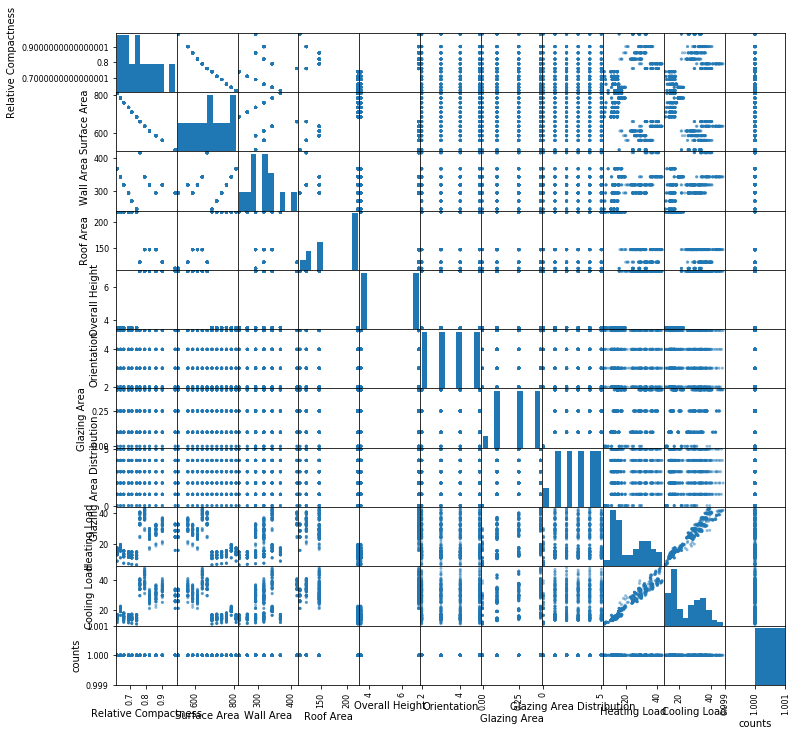

In [17]:
pd.plotting.scatter_matrix(data, figsize = (12,12))

- **Using the scatter plot we can see some of the above relationships**:
    * Positive liner correlation with Heating and Cooling Loads
    * Exponential/Linear relationship with Surface Area and Relative Compactness
    * Possible correlation with surface area and Heating/Cooling Load

Text(0,0.5,'Density')

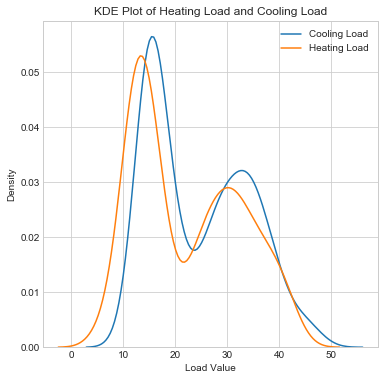

In [24]:
# Heating/Cooling Analysis
fig = plt.figure(figsize=(6,6))
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.kdeplot(data.loc[:, 'Cooling Load'], ax = ax)
sns.kdeplot(data.loc[:, 'Heating Load'], ax = ax)
ax.set_title('KDE Plot of Heating Load and Cooling Load')
ax.set_xlabel('Load Value')
ax.set_ylabel('Density')

We can see here that they follow very similar patters with heating load only slightly shifted lower than cooling load.

In [39]:
data.loc[ data.loc[:, "Glazing Area"] == 0.00, "Glazing Area"] = "0"
data.loc[ data.loc[:, "Glazing Area"] == 0.10, "Glazing Area"] = "10"
data.loc[ data.loc[:, "Glazing Area"] == 0.25, "Glazing Area"] = "25"
data.loc[ data.loc[:, "Glazing Area"] == 0.40, "Glazing Area"] = "40"

Text(0,0.5,'Cooling Load')

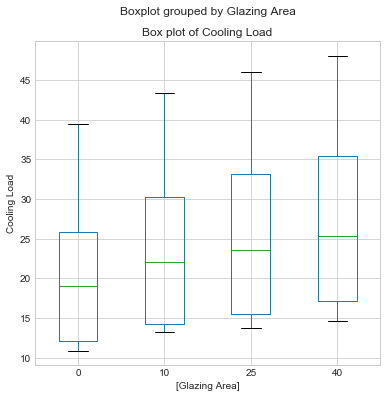

In [42]:
%matplotlib inline
fig = plt.figure(figsize=(6, 6)) # define plot area
ax = fig.gca() # define axis 
data.loc[:,['Cooling Load', 'Glazing Area']].boxplot(by = 'Glazing Area', ax = ax)
ax.set_title('Box plot of Cooling Load') # Give the plot a main title
ax.set_ylabel('Cooling Load')# Set text for y axis

ValueError: There must be exactly two hue levels to use `split`.'

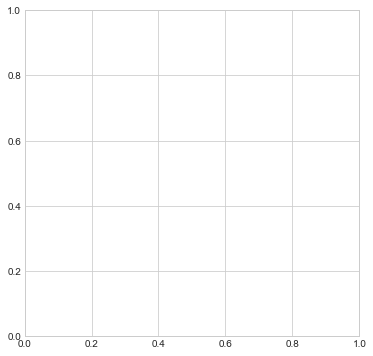

In [46]:
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.violinplot(x = 'Heating Load', y = 'Cooling Load', hue = 'Glazing Area', split = True, data = data, ax = ax)
ax.set_title('KDE plot of auto price by fuel type') # Give the plot a main title
ax.set_xlabel('Auto price') # Set text for the x axis
ax.set_ylabel('Fuel type')# Set text for y axis